In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

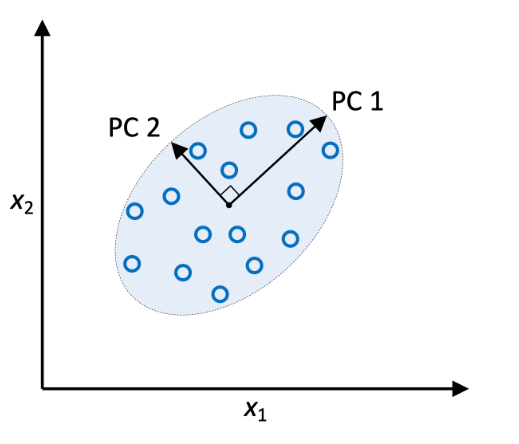

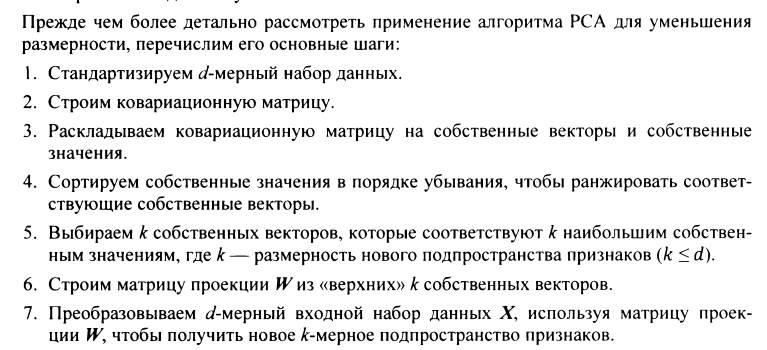

# Загрузка и подготовка данных

In [21]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [2]:
df_wine = pd.DataFrame({'X': [2, 3, 4], 'Y': [3, 5, 10]})

In [3]:
df_wine.shape

(3, 2)

In [4]:
df_wine.head()

,X,Y
0,2,3
1,3,5
2,4,10


Text(0.5, 1.0, 'Исходные данные')

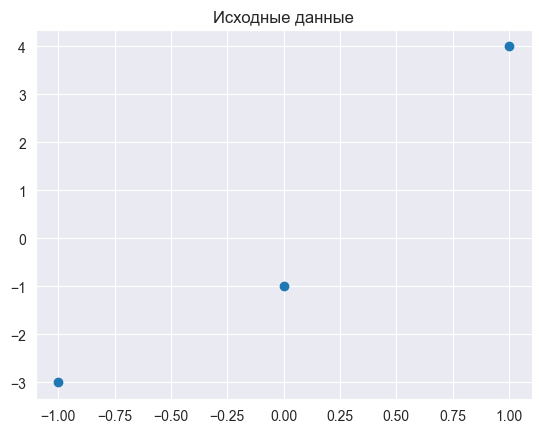

In [30]:
plt.scatter(df_wine['X'], df_wine['Y'])
plt.title('Исходные данные')

In [24]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### Выделяем таргет и всё остальное, разделяем выборку

In [57]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# Предподготовка

In [58]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
df_wine['X'] = df_wine['X'] - df_wine['X'].mean()
df_wine['Y'] = df_wine['Y'] - df_wine['Y'].mean()

In [6]:
df_wine.head()

,X,Y
0,-1.0,-3.0
1,0.0,-1.0
2,1.0,4.0


# Вывод ковариационной матрицы и собственных значений 

In [7]:
cov_mat = np.cov(df_wine.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [8]:
print('Ковариационная матрица:') 
pd.DataFrame(cov_mat)

Ковариационная матрица:


,0,1
0,1.0,3.5
1,3.5,13.0


In [9]:
print('Собственные значения \n', eigen_vals)

Собственные значения 
 [ 0.05377801 13.94622199]


In [10]:
print('Собственные вектора \n', eigen_vecs)

Собственные вектора 
 [[-0.96534421 -0.26097998]
 [ 0.26097998 -0.96534421]]


# Доли обяснённой дисперсии 

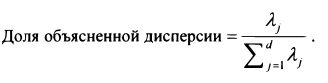

In [42]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

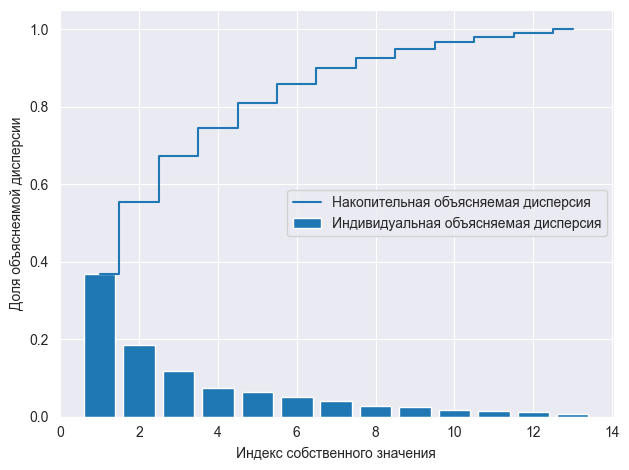

In [44]:
plt.bar(range(1, 14), var_exp, align='center',
        label='Индивидуальная объясняемая дисперсия')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Накопительная объясняемая дисперсия')
plt.ylabel('Доля объяснеямой дисперсии')
plt.xlabel('Индекс собственного значения')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

# Преобразование признаков

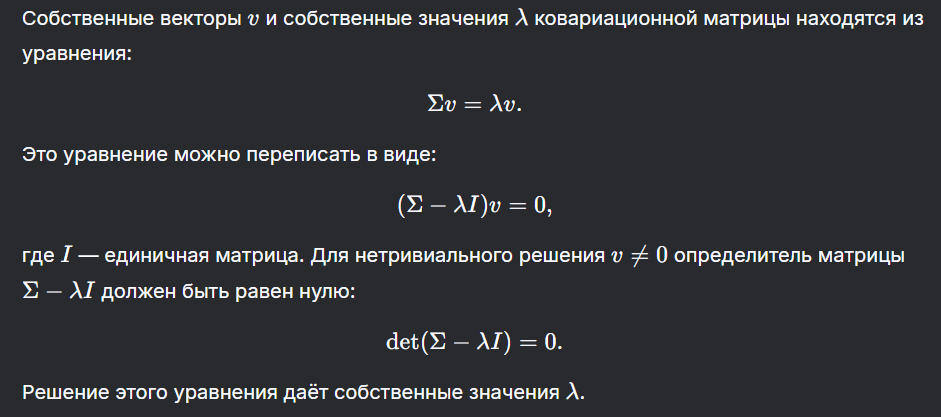

------------------

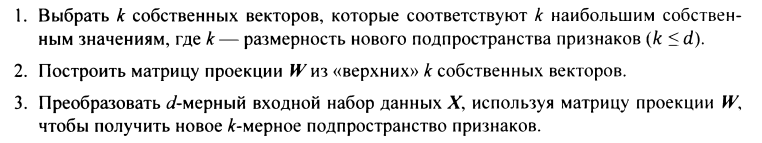

In [11]:
# Создаём списки (собственное значение, собственный вектор) 
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Сортируем список по убыванию собственного значения
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [15]:
print(f'Отсортированные пары собственных значений и собственных векторов:\n {eigen_pairs}')

Отсортированные пары собственных значений и собственных векторов:
 [(13.946221994724903, array([-0.26097998, -0.96534421])), (0.053778005275098906, array([-0.96534421,  0.26097998]))]


# Выделяем 2 главные компоненты (вектора). Тем самым построим матрицу проекции

In [16]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Матрица W:\n', w)

Матрица W:
 [[-0.26097998 -0.96534421]
 [-0.96534421  0.26097998]]


# Проецируем наши данные на вектора с помощью скалярного произведения матриц

In [18]:
df_wine.dot(w).shape

(3, 2)

In [20]:
df_wine

,X,Y
0,-1.0,-3.0
1,0.0,-1.0
2,1.0,4.0


In [19]:
df_wine.dot(w)

,0,1
0,3.157013,0.182404
1,0.965344,-0.260980
2,-4.122357,0.078576


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


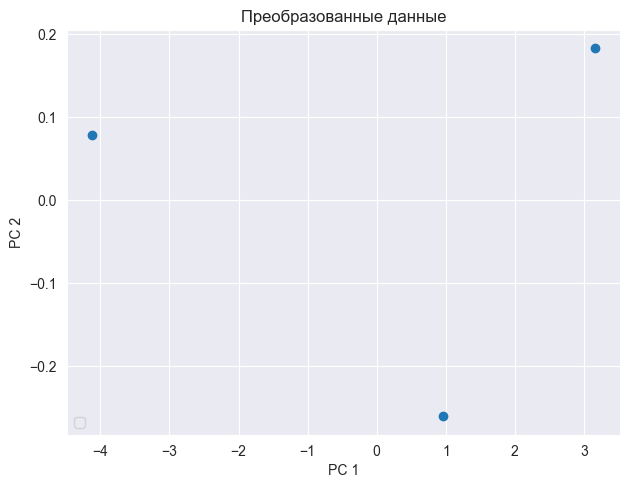

In [31]:
X_train_pca = df_wine.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

# for l, c, m in zip(np.unique(y_train), colors, markers):
#     plt.scatter(X_train_pca[y_train == l, 0], 
#                 X_train_pca[y_train == l, 1], 
#                 c=c, label=f'Class {l}', marker=m)

plt.scatter(X_train_pca[0], X_train_pca[1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_03.png', dpi=300)
plt.title('Преобразованные данные')
plt.show()

In [27]:
X_train_pca

,0,1
0,3.157013,0.182404
1,0.965344,-0.260980
2,-4.122357,0.078576


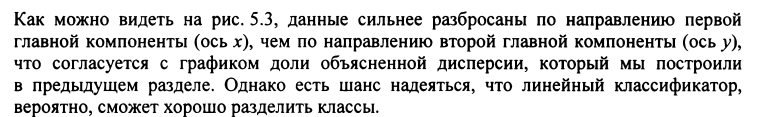

# Реализация PCA в sklearn

In [64]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print(f'Доли объяснённой дисперсии такие же, как и в предыдущих рассчётах: \n{pca.explained_variance_ratio_}')

Доли объяснённой дисперсии такие же, как и в предыдущих рассчётах: 
[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


In [65]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [24]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

KeyError: 0

# Применение алгоритма лог. регрессии с методом PCA 

In [71]:
# Функция для отрисовки графика

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Вводим маркеры и цвета
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Строим разделительные полосы
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Строим наблюдения
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [72]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

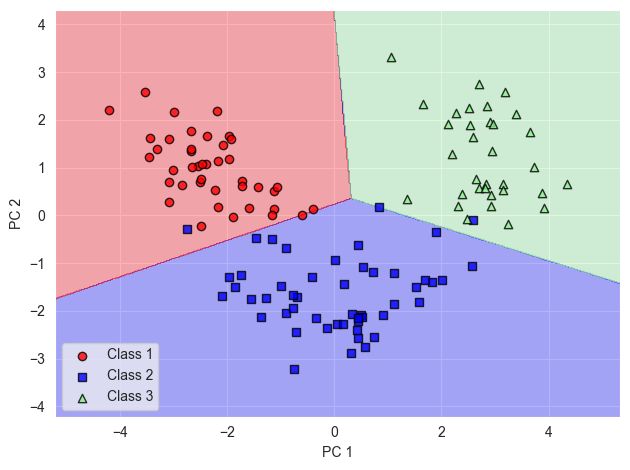

In [73]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()